# Script programming (laboratory 08)

## GeoPandas

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 Laboratory 08 - GeoPortal.ipynb

```

<u>Grades</u>

| Number of points | mark |
| :----            | ---: |
| <5               | 2    |
| 5                | 3    |
| 6-7              | 3.5  |
| 8                | 4    |
| 9-10             | 4.5  |
| 11               | 5    |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted next day (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days) but less than a month.
* `mark = 2` if tasks are submitted a month after the laboratory (or does not at all).

<u>Warning:</u>

It is NOT allowed to share your `.ipynb` file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.


### Task 1: Read the data

Dataset URL address: 

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2021.csv

In [ ]:
import numpy as np
import pandas as pd

url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2021.csv'
df=pd.read_csv(url, sep =',')
df

### Task 2: Create country code column.
Create a column `iso_a3`, a mapping from `Country_Region` column to country code accordingly to iso a3 convention: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3.

Example:
`Poland` is mapped to `POL`.

In [51]:
codes=pd.read_csv('country_code.txt', sep='  ').set_index('Country_Region')
codes=codes.to_dict()['iso_a3']
serie2=df.iloc[:,3]
df2=serie2.map(codes).to_frame().rename(columns={'Country_Region': 'iso_a3'})
df2=df.join(df2)
df2

<ipython-input-51-edd633e79f40>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  codes=pd.read_csv('country_code.txt', sep='  ').set_index('Country_Region')


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,iso_a3
0,NaN,NaN,NaN,Afghanistan,2021-05-06 04:20:38,33.939110,67.709953,60797,2654,53750.0,4393.0,Afghanistan,156.176704,4.365347,AFG
1,NaN,NaN,NaN,Albania,2021-05-06 04:20:38,41.153300,20.168300,131419,2403,113468.0,15548.0,Albania,4566.648134,1.828503,ALB
2,NaN,NaN,NaN,Algeria,2021-05-06 04:20:38,28.033900,1.659600,123272,3299,85869.0,34104.0,Algeria,281.115320,2.676196,DZA
3,NaN,NaN,NaN,Andorra,2021-05-06 04:20:38,42.506300,1.521800,13340,127,12884.0,329.0,Andorra,17265.255937,0.952024,AND
4,NaN,NaN,NaN,Angola,2021-05-06 04:20:38,-11.202700,17.873900,27529,618,24492.0,2419.0,Angola,83.760651,2.244905,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,NaN,NaN,NaN,Vietnam,2021-05-06 04:20:38,14.058324,108.277199,3030,35,2560.0,435.0,Vietnam,3.112846,1.155116,NaN
3979,NaN,NaN,NaN,West Bank and Gaza,2021-05-06 04:20:38,31.952200,35.233200,299736,3317,279652.0,16767.0,West Bank and Gaza,5875.545143,1.106641,NaN
3980,NaN,NaN,NaN,Yemen,2021-05-06 04:20:38,15.552727,48.516388,6414,1260,2966.0,2188.0,Yemen,21.504750,19.644528,YEM
3981,NaN,NaN,NaN,Zambia,2021-05-06 04:20:38,-13.133897,27.849332,91849,1255,90198.0,396.0,Zambia,499.614990,1.366373,ZMB


### Task 3: Remove `NaN` values from column `iso_a3`.

In [118]:
df3=df2.dropna(subset=['iso_a3'])
df3

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,iso_a3
0,NaN,NaN,NaN,Afghanistan,2021-05-06 04:20:38,33.939110,67.709953,60797,2654,53750.0,4393.0,Afghanistan,156.176704,4.365347,AFG
1,NaN,NaN,NaN,Albania,2021-05-06 04:20:38,41.153300,20.168300,131419,2403,113468.0,15548.0,Albania,4566.648134,1.828503,ALB
2,NaN,NaN,NaN,Algeria,2021-05-06 04:20:38,28.033900,1.659600,123272,3299,85869.0,34104.0,Algeria,281.115320,2.676196,DZA
3,NaN,NaN,NaN,Andorra,2021-05-06 04:20:38,42.506300,1.521800,13340,127,12884.0,329.0,Andorra,17265.255937,0.952024,AND
4,NaN,NaN,NaN,Angola,2021-05-06 04:20:38,-11.202700,17.873900,27529,618,24492.0,2419.0,Angola,83.760651,2.244905,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,NaN,NaN,NaN,Uzbekistan,2021-05-06 04:20:38,41.377491,64.585262,92724,655,88535.0,3534.0,Uzbekistan,277.042782,0.706397,UZB
3976,NaN,NaN,NaN,Vanuatu,2021-05-06 04:20:38,-15.376700,166.959200,4,1,3.0,0.0,Vanuatu,1.366680,25.000000,VUT
3980,NaN,NaN,NaN,Yemen,2021-05-06 04:20:38,15.552727,48.516388,6414,1260,2966.0,2188.0,Yemen,21.504750,19.644528,YEM
3981,NaN,NaN,NaN,Zambia,2021-05-06 04:20:38,-13.133897,27.849332,91849,1255,90198.0,396.0,Zambia,499.614990,1.366373,ZMB


### Task 4: Display on bar chart with the number of deaths for at least four chosen countries.

<AxesSubplot:xlabel='Country'>

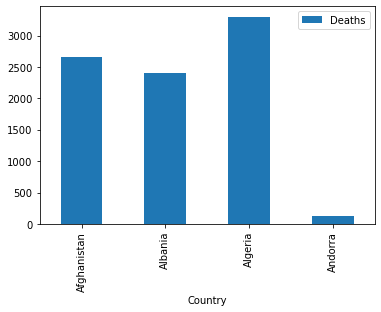

In [81]:
df4=df3.groupby('Country_Region').sum().head(4).reset_index()[['Country_Region','Deaths']].rename(columns={'Country_Region': 'Country'}).set_index('Country')
df4.plot.bar()

### Task 5: Display the world map without Antarctica.

<AxesSubplot:>

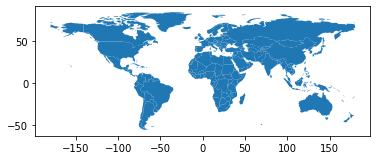

In [85]:
import geopandas as geo
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
world=world[world['continent']!='Antarctica']

world.plot()

### Task 6: Merge/join previously created dataset with GeoDataFrame `world`.

Additionally, replace the `NaN` values with zeros. To do that use `.fillna()` method.
Make sure that that the result is `GeoDataFrame`.

In [112]:
df6=df3.set_index('iso_a3')
world6=world.set_index('iso_a3')
world6=world6.join(df6).reset_index()
#world6=world6.fillna(0) #provides error: NotImplementedError: fillna currently only supports filling with a scalar geometry 
#it has some problem with geopandas module version acording to information from stack overflow
type(world6)

geopandas.geodataframe.GeoDataFrame

### Task 7: Plot the number of deaths on the world map using GeoPandas `plot` method.

<AxesSubplot:>

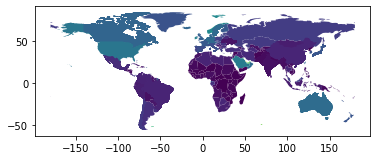

In [115]:
world7=world6
world7['Deaths'] = world7.Deaths

world7.plot(column='Deaths')